    MACHINE EXERCISE NO. 5 Non-Linear Dimensionality Reduction
        Joshua Dela Cruz
        2023-02911

    PROBLEM: 8x8 handwritten digits data
    

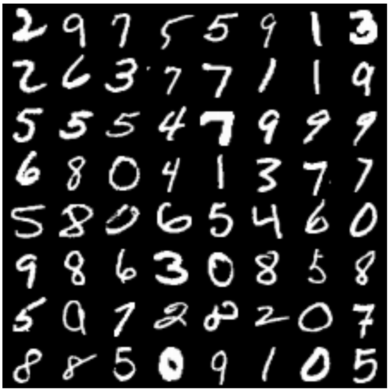

    Image reference:
    Information Theoretical Measures for Achieving Robust Learning Machines - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/A-collage-of-8-8-randomly-picked-images-of-handwritten-digits-from-the-MNIST-training_fig2_306088728 [accessed 13 Apr, 2024]

    Main Objective:
    (1) Reduce the datapoints into 2 dimensionality using various linear and non-linear techniques (LLE, t-SNE, Isomap, Laplacian Eigenmap, Kernel PCA, PCA); and,
    (2) Perform classification using (a) Kernel PCA - SVC and (b) SVC.
    

# General Resources

### Libraries

In [1]:
# Data importation and manipulation
import os 
import pandas as pd
import numpy as np

In [2]:
# Model creation, calculation and test
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
# Dimensionality Reduction Libraries
from sklearn.decomposition import PCA, KernelPCA
from sklearn import manifold

In [4]:
# Data visualization, exploratory and result analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [5]:
# Data Preparation
from sklearn.model_selection import train_test_split

In [6]:
# Auxilliaries
from time import time

In [7]:
# Color theme
colors = sns.color_palette("Set1", n_colors=10)
color_palette = 'copper_r'

In [8]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

### Dataset

#### Import

In [9]:
from sklearn.datasets import load_digits
raw_data_x, raw_data_y = load_digits(return_X_y=True)

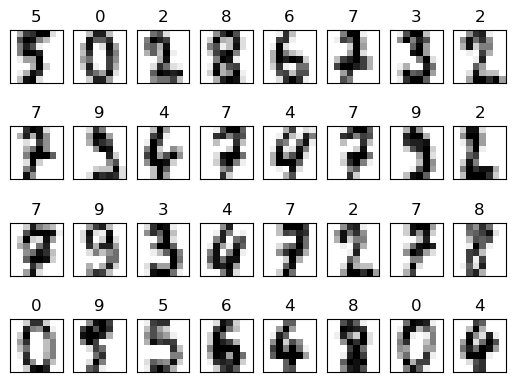

In [10]:
rows, cols = 4, 8
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
                       subplot_kw=dict(xticks=[], yticks=[]))

for row in range(rows):
    for col in range(cols):
        n = np.random.randint(1796)+1    # show random samples
        im = ax[row, col].imshow(raw_data_x[n].reshape((8,8)), cmap=plt.cm.binary)
        ax[row, col].set_title(raw_data_y[n])
        im.set_clim(0, 16)

plt.show()

In [11]:
handwritten_digits_df = pd.DataFrame(raw_data_x, columns=[f"pixel_{i}" for i in range(raw_data_x.shape[1])])
handwritten_digits_df["target"] = raw_data_y

In [12]:
handwritten_digits_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


#### Exploratory Analysis

In [13]:
handwritten_digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   floa

In [14]:
label_list = list(set(handwritten_digits_df['target'].tolist()))
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
# Obtain features and target data
features_df = handwritten_digits_df.drop(columns=['target'])
target_df = handwritten_digits_df['target']

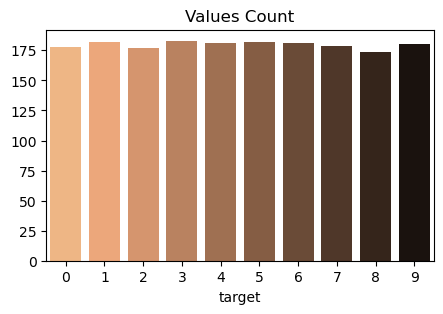

In [16]:
target_count_df = handwritten_digits_df['target'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=target_count_df.index, y=target_count_df.values, palette=color_palette)
plt.title("Values Count")
plt.show()

In [17]:
unique_class, counts = np.unique(raw_data_y, return_counts=True)

# Create a dictionary to store the counts
count_dict = dict(zip(unique_class, counts))

# Print the counts
for class_number, count in count_dict.items():
    print(f"Class {class_number} count = {count}")

Class 0 count = 178
Class 1 count = 182
Class 2 count = 177
Class 3 count = 183
Class 4 count = 181
Class 5 count = 182
Class 6 count = 181
Class 7 count = 179
Class 8 count = 174
Class 9 count = 180


    1. No null data
    2. Classes are relatively balanced with minority having 174 data and majority at around 183

#### Standardization

In [18]:
raw_data_x.shape

(1797, 64)

In [19]:
standard_scaler = StandardScaler()
scaled_data_x = standard_scaler.fit_transform(raw_data_x)

## (a) Visualization

In [20]:
def plot_2d(x, y, labels, title):
    sns.set_style("whitegrid")
    for color, i, target_name in zip(colors, labels, labels):
        plt.scatter(x[y == i, 0], x[y == i, 1], 
                    color=color, alpha=.6, lw=1, label=f'{target_name}')

    plt.legend(loc="best", shadow=False)
    plt.title(f"{title} of 8x8 Handwrittten Digits Data")
    plt.show()
    
    sns.set_style("ticks")

### Local Linear Embedding 

In [21]:
lle_standard = manifold.LocallyLinearEmbedding(n_components = 2, random_state = 0, n_neighbors = 200)
lle_data_x = lle_standard.fit_transform(scaled_data_x)

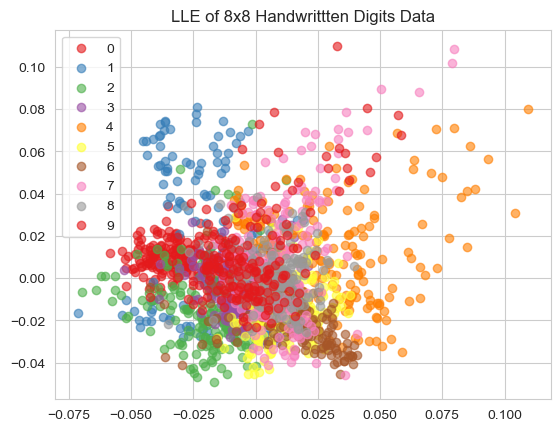

In [22]:
plot_2d(lle_data_x, raw_data_y, label_list, 'LLE')

### t-SNE

In [23]:
tsne = manifold.TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data_x = tsne.fit_transform(scaled_data_x)

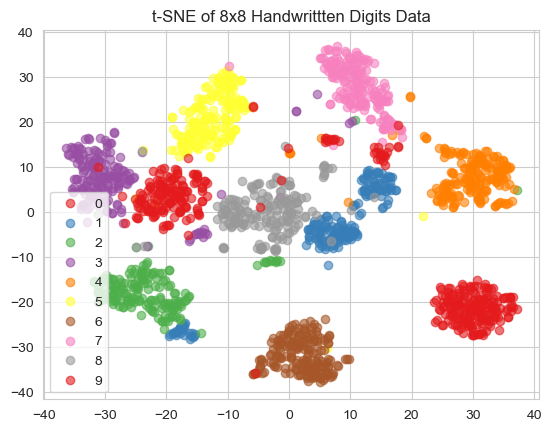

In [24]:
plot_2d(tsne_data_x, raw_data_y, label_list, 't-SNE')

### Isomap

In [25]:
iso = manifold.Isomap(n_components = 2, n_neighbors = 200)
iso_data_x = iso.fit_transform(scaled_data_x)

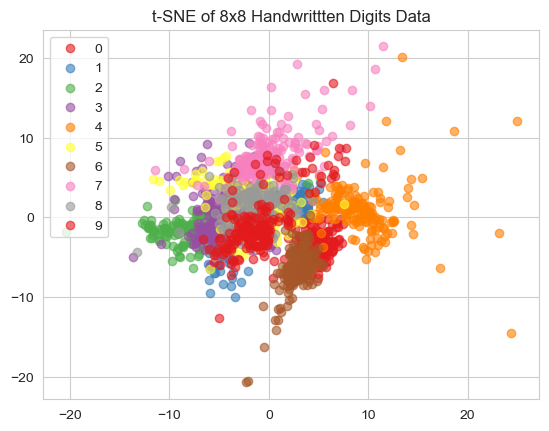

In [26]:
plot_2d(iso_data_x, raw_data_y, label_list, 't-SNE')

### Laplacian Eigenmap

In [27]:
laplacian = manifold.SpectralEmbedding(n_components = 2, n_neighbors = 200)
laplacian_data_x = laplacian.fit_transform(scaled_data_x)

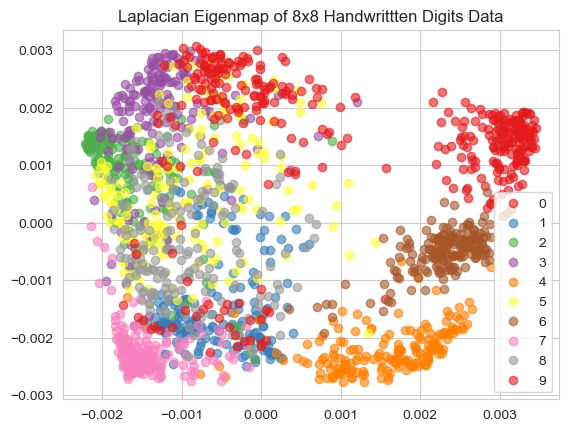

In [28]:
plot_2d(laplacian_data_x, raw_data_y, label_list, 'Laplacian Eigenmap')

### Kernel PCA

In [29]:
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.01)
kpca_data_x = kpca.fit_transform(raw_data_x)

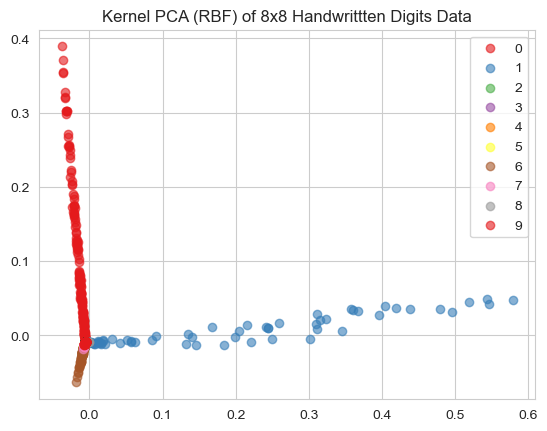

In [30]:
plot_2d(kpca_data_x, raw_data_y, label_list, 'Kernel PCA (RBF)')

### PCA

In [31]:
pca = PCA(n_components=2)
pca_data_x = pca.fit_transform(raw_data_x)

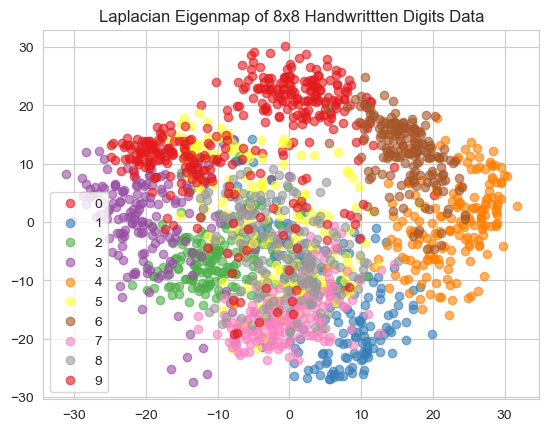

In [32]:
plot_2d(pca_data_x, raw_data_y, label_list, 'Laplacian Eigenmap')

## (b) Classification

### Data Preparation

#### Label Setup

In [33]:
label_list = list(set(handwritten_digits_df['target'].tolist()))
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### Data Partitioning

    Split samples into 70% training and 30% test data

In [34]:
print(raw_data_x.shape)
print(raw_data_y.shape)

(1797, 64)
(1797,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(raw_data_x, raw_data_y, test_size=0.3, random_state=0, stratify=raw_data_y)

### With Dimensionality Reduction

#### Fit Training

In [36]:
kpca_sigmoid = KernelPCA(n_components=40, kernel="sigmoid")

In [37]:
kpca_sigmoid_x_train = kpca_sigmoid.fit_transform(x_train)
kpca_sigmoid_x_test = kpca_sigmoid.transform(x_test)

In [38]:
kpca_svc_model = make_pipeline(StandardScaler(), kpca_sigmoid, SVC()).fit(kpca_sigmoid_x_train, y_train)

#### Testing

In [39]:
k_sigmoid_pca = KernelPCA(n_components=40, kernel="sigmoid", gamma=0.01)
k_sigmoid_pca_data_x = k_sigmoid_pca.fit_transform(raw_data_x)

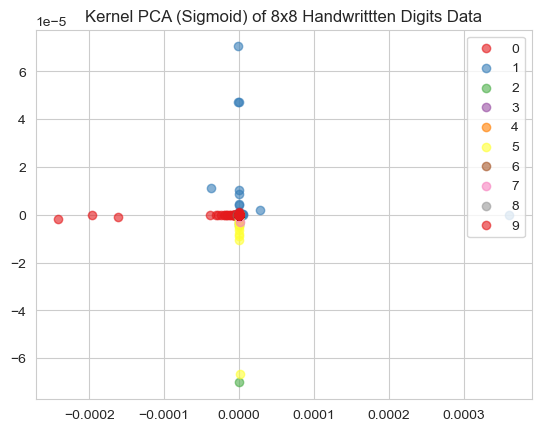

In [40]:
plot_2d(k_sigmoid_pca_data_x, raw_data_y, label_list, 'Kernel PCA (Sigmoid)')

In [41]:
def create_confusion_matrix_and_report(model, x, y, labels):
    labels = [str(label) for label in labels]
    
    y_prediction = model.predict(x)
    conf_matrix = confusion_matrix(y, y_prediction)

    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
    conf_matrix_display.plot(cmap=color_palette)

    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_prediction, target_names=labels)
    print(report)
    
    # Split the classification report by lines
    report_lines = report.strip().split('\n')

    # Corresponding line to 'weighted avg'
    weighted_avg_line = report_lines[-1]

    # Split the 'weighted avg' line by spaces
    weighted_avg_values = weighted_avg_line.split()

    # Extract the first column  from the 'weighted avg' line
    weighted_avg_accuracy = float(weighted_avg_values[2])
    
    return weighted_avg_accuracy

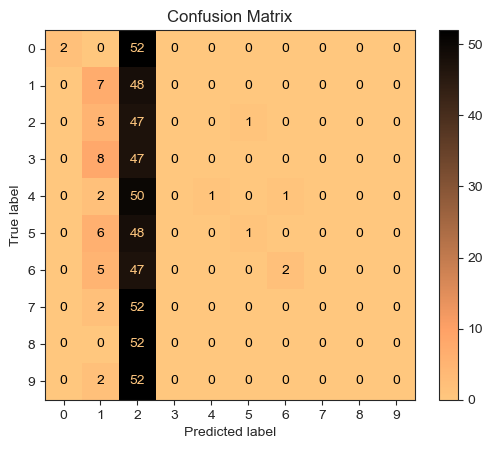

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        54
           1       0.19      0.13      0.15        55
           2       0.09      0.89      0.17        53
           3       0.00      0.00      0.00        55
           4       1.00      0.02      0.04        54
           5       0.50      0.02      0.04        55
           6       0.67      0.04      0.07        54
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00        54

    accuracy                           0.11       540
   macro avg       0.35      0.11      0.05       540
weighted avg       0.35      0.11      0.05       540



In [42]:
kpca_test_accuracy = create_confusion_matrix_and_report(kpca_svc_model, kpca_sigmoid_x_test, y_test, label_list)

### Without Dimensionality Reduction

#### Fit Training

In [43]:
svc_model = make_pipeline(StandardScaler(), SVC()).fit(x_train, y_train)

#### Testing

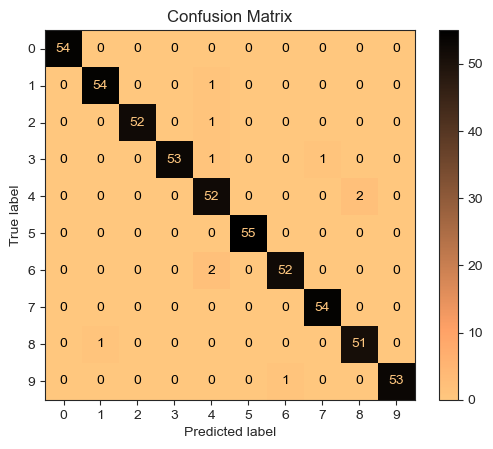

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.98      0.98        55
           2       1.00      0.98      0.99        53
           3       1.00      0.96      0.98        55
           4       0.91      0.96      0.94        54
           5       1.00      1.00      1.00        55
           6       0.98      0.96      0.97        54
           7       0.98      1.00      0.99        54
           8       0.96      0.98      0.97        52
           9       1.00      0.98      0.99        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [44]:
test_accuracy = create_confusion_matrix_and_report(svc_model, x_test, y_test, label_list)

# Insights

    (a) Among the dimensionality reduction techniques applied, t-SNE produced the clearest clusters of the classes, with a few outliers for some classes and several errors for class 1, which was grouped near other classes. PCA followed, as although the distinction between classes was not as clear, the separation of some classes was still visible. The worst performer was Kernel PCA, as it treated the data points linearly.

    (b) Based on the classification report and confusion matrix, the combination of a standard scaler with the default hyperparameters of an SVC classifier outperformed the approach of using a standard scaler followed by kernel PCA for dimensionality reduction to two features before classification. This difference in performance could be attributed to the nature of the sigmoid kernel used in the kernel PCA step. The sigmoid kernel maps the data into a high-dimensional feature space, but this transformation may not preserve the inherent structure of the handwritten digits well, resulting in the loss of crucial information necessary for accurate classification. Additionally, the linear separation approach of the sigmoid kernel in a high-dimensional space may not be suitable for this dataset, further contributing to the lower performance observed.